In [7]:
import matplotlib.pyplot as plt
import json
from collections import Counter
import numpy
from linear_algebra import distance
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

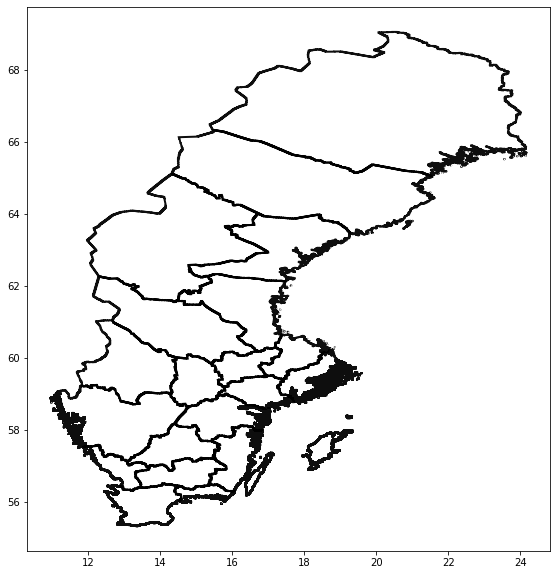

In [6]:
from descartes import PolygonPatch

geojson = {}
with open("mapa.json", "r") as f:
    geojson = json.load(f)
fig = plt.figure(figsize=(20,10)) 
ax = fig.gca() 
for poly in geojson['geometries']:
    ax.add_patch(PolygonPatch(poly, alpha=15, zorder=10, fill=False, lw=2))
    ax.axis('scaled')
plt.show()

In [9]:
cities = [(22,57,'JavaScript'),(60,12.5,'C++'),(19.7,57, 'Python'),(64,15,'JavaScript'),(12,58,'C++'),(16,62,'Python'),(17,63,'JavaScript'),(21.7,63.8,'C++'),(16,56,'Python')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [10]:

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     
    else:
        return majority_vote(labels[:-1])

In [11]:
def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    k_nearest_labels = [label for _, label in by_distance[:k]]

    return majority_vote(k_nearest_labels)

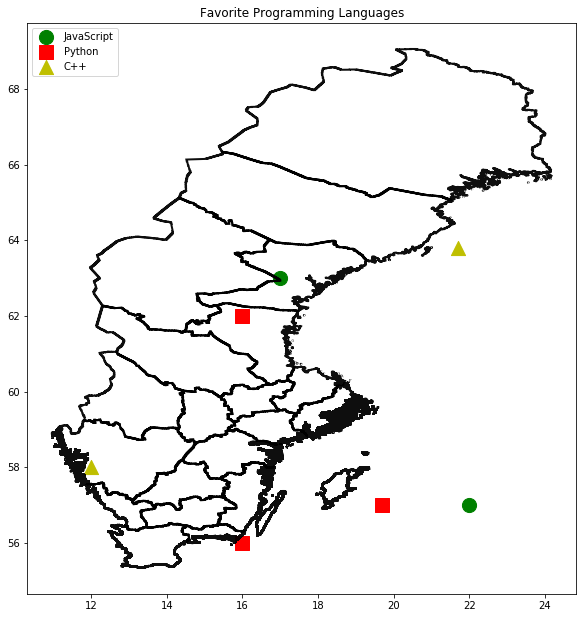

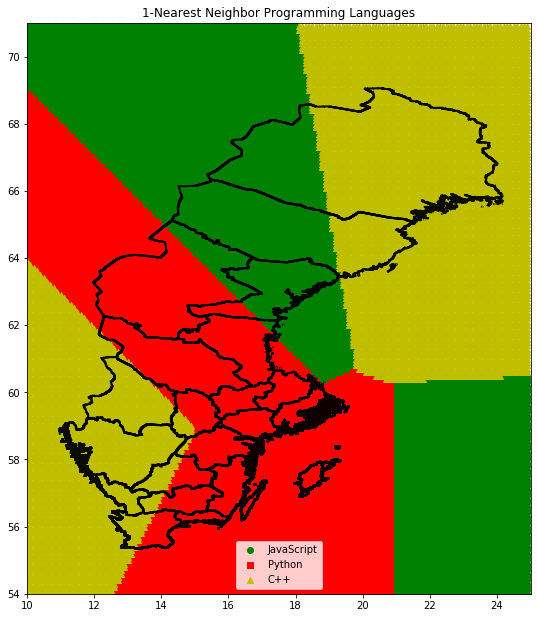

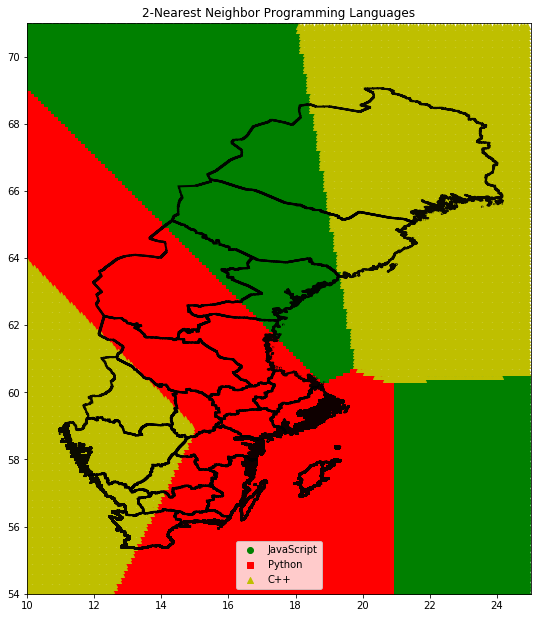

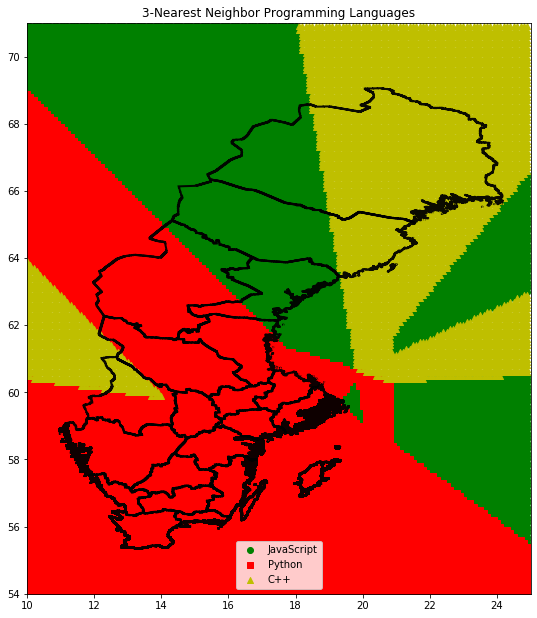

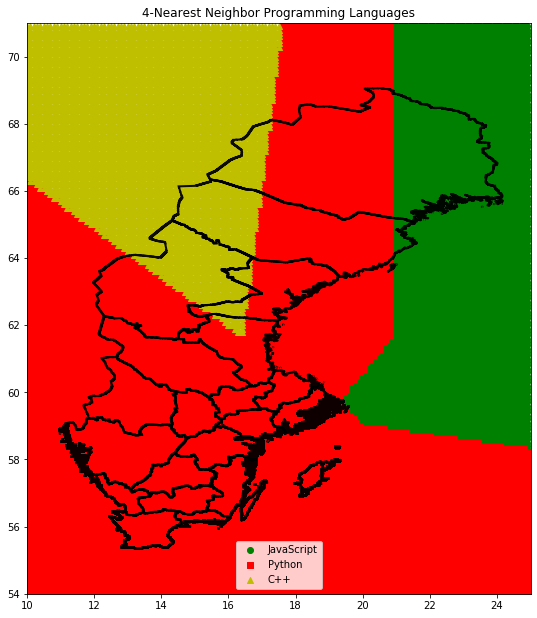

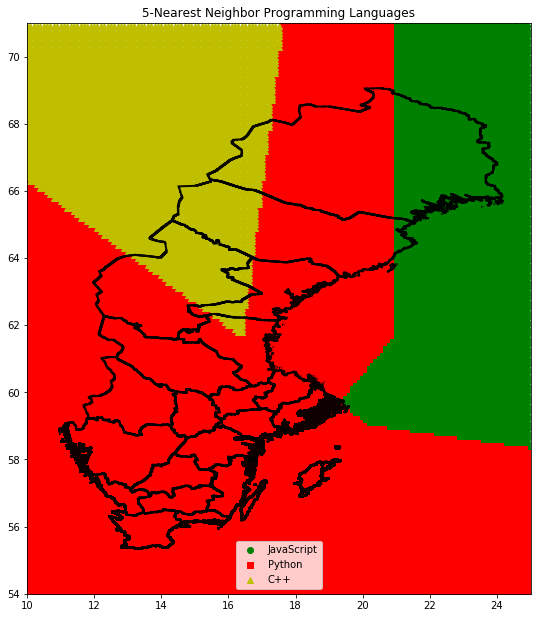

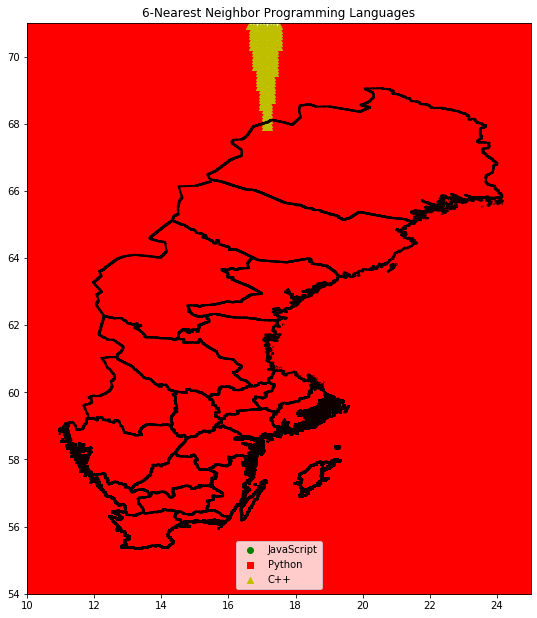

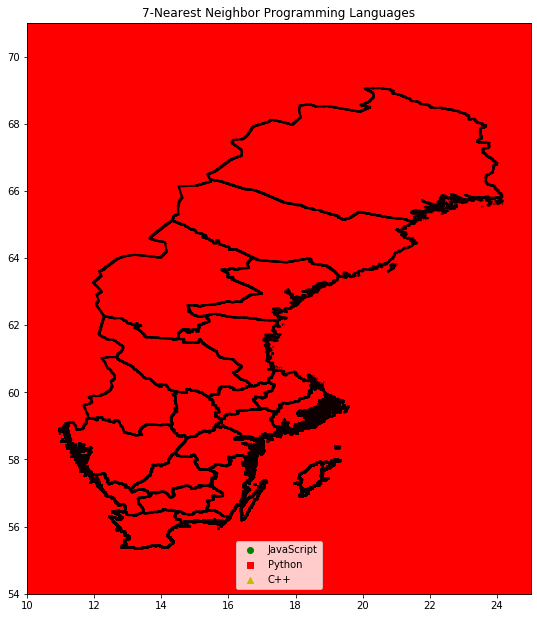

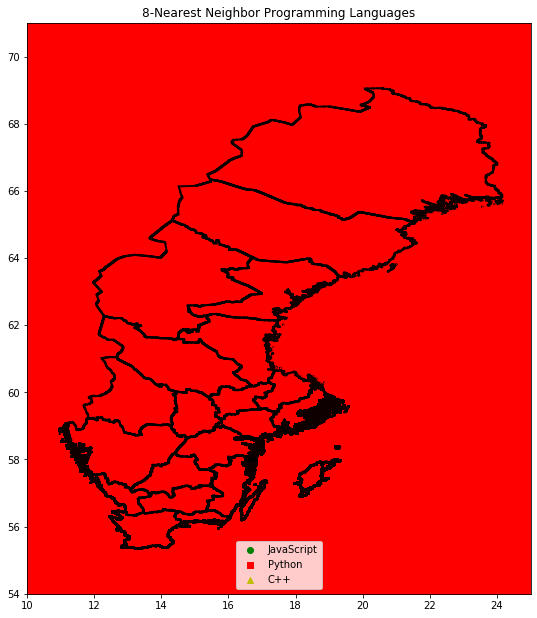

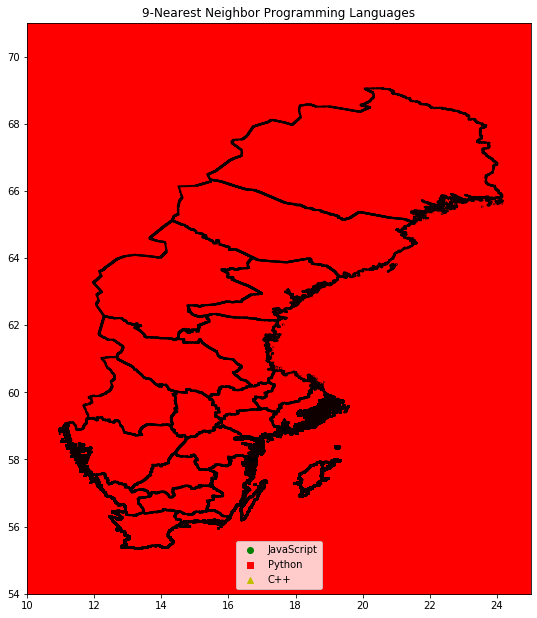

In [17]:

def plot_state_borders(plt, color='0.8'):
    eojson = {}
    with open("mapa.json", "r") as f:
        geojson = json.load(f)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    ax = plt.gca() 
    for poly in geojson['geometries']:
        ax.add_patch(PolygonPatch(poly, alpha=15, zorder=10, fill=False, lw=2))
        ax.axis([10,25,54,71])
        ax.axis('scaled')
def plot_cities():

    plots = { "JavaScript" : ([], []), "Python" : ([], []), "C++" : ([], []) }

    markers = { "JavaScript" : "o", "Python" : "s", "C++" : "^" }
    colors  = { "JavaScript" : "g", "Python" : "r", "C++" : "y" }

    plot_state_borders(plt)    
    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10, s=200)

    plt.legend(loc=0)
    plt.title("Favorite Programming Languages")
    plt.show()

def classify_and_plot_grid(k=1):
    plots = { "JavaScript" : ([], []), "Python" : ([], []), "C++" : ([], []) }
    markers = { "JavaScript" : "o", "Python" : "s", "C++" : "^" }
    colors  = { "JavaScript" : "g", "Python" : "r", "C++" : "y" }
    
    for longitude in numpy.arange(10,25, 0.1):
        for latitude in numpy.arange(54,71, 0.1):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(plt, color='black') 

    plt.legend(loc=0)          
    plt.axis([10,25,54,71])
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()

plot_cities()
for k in range(1,10):
    classify_and_plot_grid(k)
